In [1]:
import pandas as pd
df = pd.read_csv('tree.csv')
df.head()

,Days,Outlook,Temperature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Sunny,Warm,Indoor,No
2,3,Cloudy,Warm,Indoor,No
3,4,Sunny,Warm,Indoor,No
4,5,Cloudy,Cold,Indoor,Yes


In [2]:
df = df.drop('Days',axis=1)

In [3]:
df.head()

,Outlook,Temperature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Sunny,Warm,Indoor,No
2,Cloudy,Warm,Indoor,No
3,Sunny,Warm,Indoor,No
4,Cloudy,Cold,Indoor,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       7 non-null      object
 1   Temperature   7 non-null      object
 2   Routine       7 non-null      object
 3   Wear Jacket?  7 non-null      object
dtypes: object(4)
memory usage: 352.0+ bytes


In [5]:
y = df['Wear Jacket?']

In [6]:
y

0     No
1     No
2     No
3     No
4    Yes
5    Yes
6    Yes
Name: Wear Jacket?, dtype: object

In [7]:
x = df.drop('Wear Jacket?',axis=1)

In [8]:
x

,Outlook,Temperature,Routine
0,Sunny,Cold,Indoor
1,Sunny,Warm,Indoor
2,Cloudy,Warm,Indoor
3,Sunny,Warm,Indoor
4,Cloudy,Cold,Indoor
5,Cloudy,Cold,Indoor
6,Sunny,Cold,Indoor


# Preprocessing

In [9]:
#Encoding 
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
x.Outlook = le.fit_transform(df['Outlook'])

In [12]:
x.head()

,Outlook,Temperature,Routine
0,1,Cold,Indoor
1,1,Warm,Indoor
2,0,Warm,Indoor
3,1,Warm,Indoor
4,0,Cold,Indoor


In [13]:
x.Temperature = le.fit_transform(df['Temperature'])
x.Routine = le.fit_transform(df['Routine'])

In [14]:
x.head()

,Outlook,Temperature,Routine
0,1,0,0
1,1,1,0
2,0,1,0
3,1,1,0
4,0,0,0


# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf = DecisionTreeClassifier()

In [17]:
clf.fit(x,y)

DecisionTreeClassifier()

In [18]:
clf.predict([[1,0,0]])  #1=sunny; 1=warm, 0=indoor

/home/user/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [20]:
clf.predict([[0,0,1]])  #1=sunny; 0=cold, 1=indoor

/home/user/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

[Text(0.6, 0.8333333333333334, 'X[1] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.4, 0.5, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

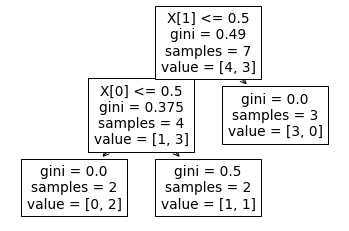

In [21]:
from sklearn import tree
tree.plot_tree(clf)

In [25]:
x.columns

Index(['Outlook', 'Temperature', 'Routine'], dtype='object')

[Text(0.6, 0.8333333333333334, 'Temperature <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.4, 0.5, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

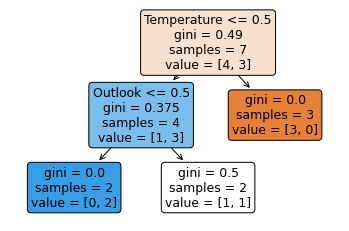

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)
plt